# Installing Dependencies

In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, leaves_list
import seaborn as sns

# Loading Data

In [2]:
daily_returns = pd.read_excel("daily_returns.xlsx")
daily_returns['Date']  = pd.to_datetime(daily_returns["Date"])
daily_returns = daily_returns.set_index('Date')
daily_returns.describe()

,HDFCBANK,ICICIBANK,SBIN,TCS,INFY,HCLTECH,BAJAJ-AUTO,M&M,MARUTI,HINDUNILVR,...,HINDALCO,LT,ULTRACEMCO,ADANIPORTS,BHARTIARTL,TATACOMM,INDUSTOWER,TITAN,DMART,TRENT
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,...,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,0.029856,0.072911,0.114615,0.007218,0.030647,0.080559,0.145516,0.144467,0.080979,0.003023,...,0.116470,0.096739,0.088562,0.170402,0.137747,0.056869,0.177506,0.081271,0.018167,0.178356
std,1.154501,1.109959,1.434597,1.243185,1.504596,1.439688,1.540097,1.726995,1.268610,1.148318,...,1.790287,1.470166,1.301380,2.252128,1.265147,1.776723,2.248385,1.306813,1.621008,2.204728
min,-8.435800,-7.633600,-14.404000,-4.219100,-9.422700,-8.839400,-12.890700,-6.614300,-4.129600,-7.400400,...,-12.421700,-12.674600,-5.269800,-21.149700,-6.570300,-6.027300,-15.398300,-7.180500,-8.509200,-14.774800
25%,-0.538200,-0.494300,-0.641750,-0.657450,-0.808800,-0.682600,-0.690650,-0.860350,-0.646950,-0.589050,...,-0.783600,-0.651400,-0.716000,-0.825700,-0.570250,-0.966750,-1.003450,-0.646800,-0.827050,-0.845150
50%,0.058200,0.050800,0.099800,-0.057000,-0.016100,0.024300,0.116900,0.127800,-0.013100,-0.019900,...,0.144300,0.057300,0.062200,0.069200,0.053600,-0.012700,0.028200,0.030100,-0.023600,0.098600
75%,0.640350,0.619100,0.812050,0.629550,0.739200,0.788250,0.852000,1.101450,0.710950,0.611050,...,1.104750,0.836000,0.772500,1.059000,0.802900,0.950050,1.300250,0.816550,0.800200,1.187150
max,4.628700,4.716100,9.068500,6.632800,7.934000,7.710000,6.720400,6.531500,8.750800,5.959500,...,7.118100,6.277200,6.799800,15.301900,4.502600,10.219200,12.808900,6.715500,11.467400,18.863300


In [3]:
correlation_matrix = daily_returns.corr()
abs_correlation_matrix = correlation_matrix.abs()

In [4]:
abs_correlation_matrix

,HDFCBANK,ICICIBANK,SBIN,TCS,INFY,HCLTECH,BAJAJ-AUTO,M&M,MARUTI,HINDUNILVR,...,HINDALCO,LT,ULTRACEMCO,ADANIPORTS,BHARTIARTL,TATACOMM,INDUSTOWER,TITAN,DMART,TRENT
HDFCBANK,1.000000,0.442166,0.354503,0.134624,0.187362,0.135354,0.190262,0.301233,0.183162,0.097696,...,0.272009,0.335537,0.325016,0.330891,0.228334,0.210077,0.236147,0.172583,0.085035,0.156020
ICICIBANK,0.442166,1.000000,0.433852,0.181925,0.217176,0.169792,0.191910,0.309102,0.202876,0.066014,...,0.236370,0.336296,0.348369,0.339775,0.315037,0.208554,0.203394,0.154583,0.049896,0.149810
SBIN,0.354503,0.433852,1.000000,0.188948,0.154046,0.182711,0.192694,0.299909,0.237000,0.020666,...,0.315305,0.454638,0.362266,0.496380,0.244054,0.277067,0.372788,0.227805,0.065242,0.260098
TCS,0.134624,0.181925,0.188948,1.000000,0.698949,0.650787,0.113396,0.219677,0.158746,0.176033,...,0.210470,0.249293,0.197198,0.151651,0.216806,0.181545,0.109536,0.181426,0.085956,0.136598
INFY,0.187362,0.217176,0.154046,0.698949,1.000000,0.672169,0.114237,0.261979,0.136105,0.178341,...,0.220876,0.233953,0.198448,0.148992,0.247369,0.182252,0.114989,0.198148,0.057502,0.149599
HCLTECH,0.135354,0.169792,0.182711,0.650787,0.672169,1.000000,0.189090,0.203600,0.174924,0.182383,...,0.260132,0.266169,0.219136,0.162177,0.261235,0.200927,0.112562,0.219701,0.103735,0.185227
BAJAJ-AUTO,0.190262,0.191910,0.192694,0.113396,0.114237,0.189090,1.000000,0.355140,0.369367,0.151628,...,0.241431,0.233521,0.278735,0.241866,0.274561,0.277848,0.179219,0.246244,0.132394,0.272489
M&M,0.301233,0.309102,0.299909,0.219677,0.261979,0.203600,0.355140,1.000000,0.399172,0.172657,...,0.264057,0.262873,0.369842,0.306375,0.293938,0.226681,0.236415,0.302031,0.181244,0.297385
MARUTI,0.183162,0.202876,0.237000,0.158746,0.136105,0.174924,0.369367,0.399172,1.000000,0.194905,...,0.231859,0.250852,0.296284,0.251301,0.283472,0.222507,0.213489,0.286256,0.234346,0.199180
HINDUNILVR,0.097696,0.066014,0.020666,0.176033,0.178341,0.182383,0.151628,0.172657,0.194905,1.000000,...,0.032197,0.025325,0.183746,0.045858,0.112278,0.082969,0.031470,0.195535,0.221746,0.106928


In [5]:
sectors = pd.read_excel('stock_categories.xlsx')
sectors = sectors.set_index('Symbol')
sectors.describe()

,Category,Company Name
count,30,30
unique,10,30
top,Banking & Finance,HDFC Bank
freq,3,1


# Hierarchical Risk Parity

In [6]:
# Single linkage
# Dissimilarity is based on correlations
# Distance = 1 - abs(correlation)
distance_matrix = 1 - correlation_matrix.abs()

# Hierarchical clustering linkage
Z = linkage(distance_matrix, method='single')

C:\Users\kiran\AppData\Local\Temp\ipykernel_4744\1721350311.py:7: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='single')


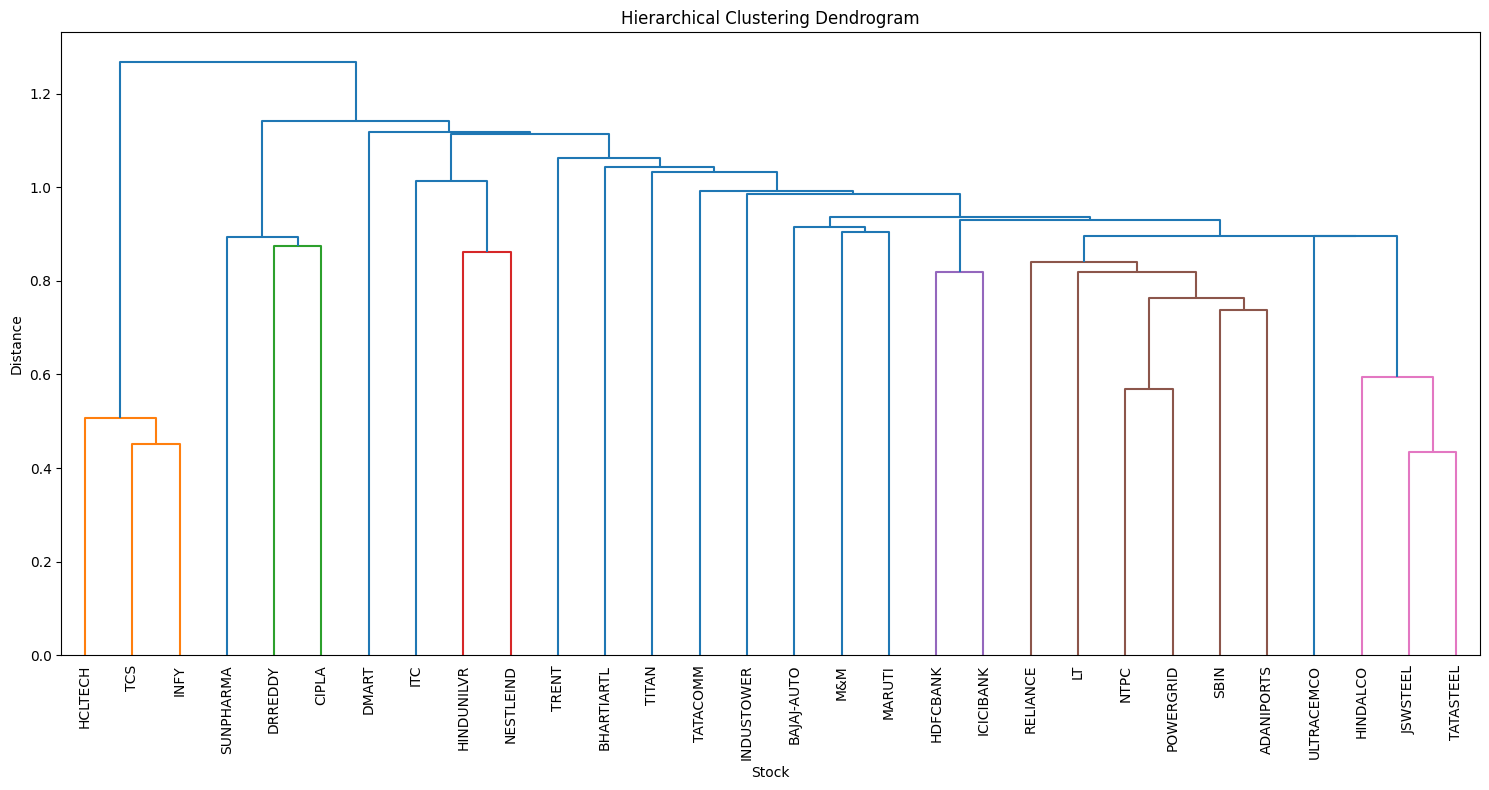

In [7]:
# Dendrogram
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Stock')
plt.ylabel('Distance')
dendrogram(
    Z,
    labels=correlation_matrix.columns,
    leaf_rotation=90.,
    leaf_font_size=10.,
)
plt.tight_layout()
plt.show()

In [8]:
# 10 clusters
k = 10
clusters_indices = fcluster(Z, k, criterion='maxclust')

clustered_stocks = {}
for stock, cluster_id in zip(correlation_matrix.columns, clusters_indices):
    if cluster_id not in clustered_stocks:
        clustered_stocks[cluster_id] = []
    clustered_stocks[cluster_id].append(stock)

for i in sorted(clustered_stocks.keys()):
    print(f"Cluster {i}: {clustered_stocks[i]}")

Cluster 1: ['TCS', 'INFY', 'HCLTECH']
Cluster 2: ['SUNPHARMA', 'DRREDDY', 'CIPLA']
Cluster 3: ['HINDUNILVR', 'NESTLEIND']
Cluster 4: ['ITC']
Cluster 5: ['HDFCBANK', 'ICICIBANK', 'SBIN', 'BAJAJ-AUTO', 'M&M', 'MARUTI', 'RELIANCE', 'NTPC', 'POWERGRID', 'JSWSTEEL', 'TATASTEEL', 'HINDALCO', 'LT', 'ULTRACEMCO', 'ADANIPORTS', 'INDUSTOWER']
Cluster 6: ['TATACOMM']
Cluster 7: ['TITAN']
Cluster 8: ['BHARTIARTL']
Cluster 9: ['TRENT']
Cluster 10: ['DMART']


## Quasi-Diagonalization

In [9]:
order_ix = leaves_list(Z)
ordered_idx = correlation_matrix.columns[order_ix]
ordered_tickers = ordered_idx.tolist()

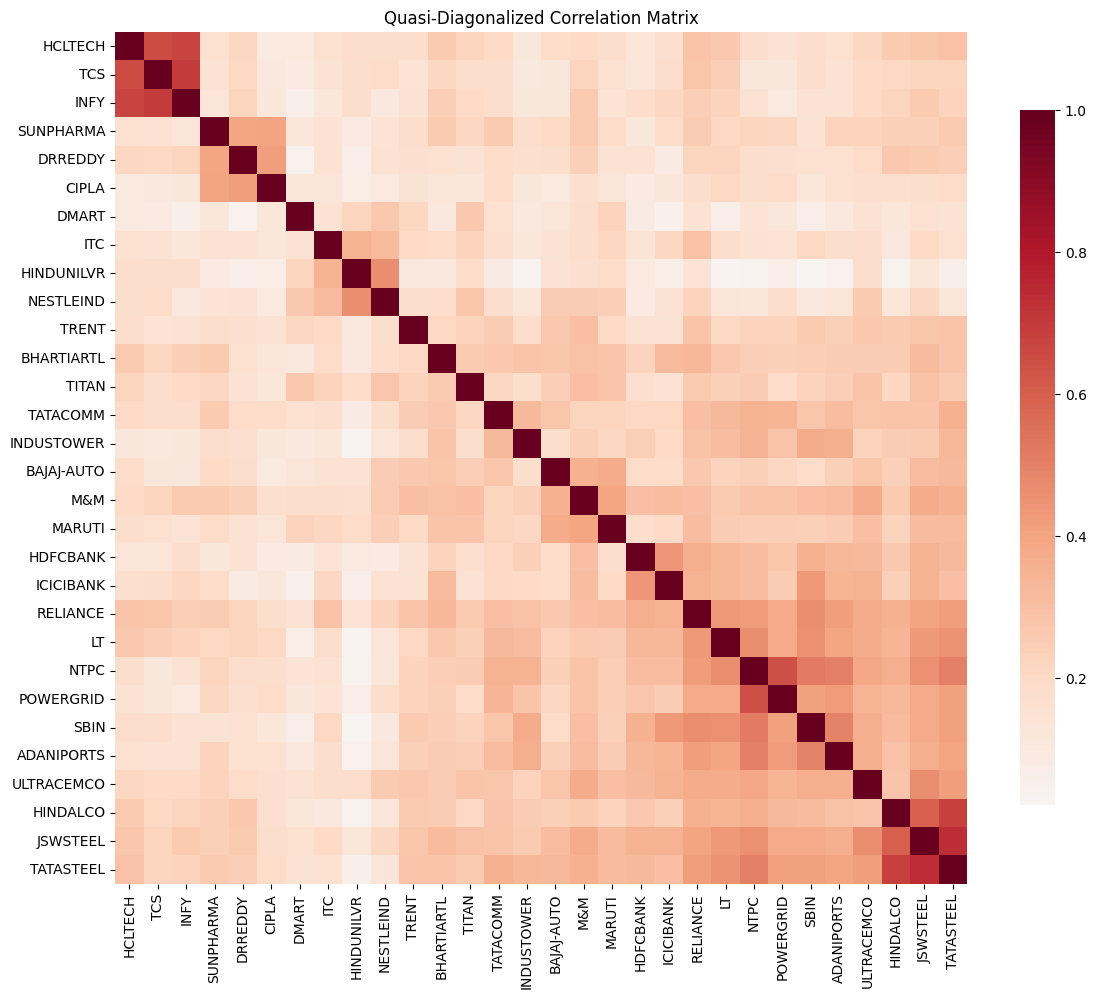

In [10]:
corr_reordered = abs_correlation_matrix.loc[ordered_tickers, ordered_tickers]
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_reordered,
    cmap='RdBu_r',
    center=0,
    square=True,
    xticklabels=True,
    yticklabels=True,
    cbar_kws={'shrink': 0.8}
)

plt.title("Quasi-Diagonalized Correlation Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Recursive Bisection

In [11]:
def get_cluster_var(cov, c_items):
    # Calculate cluster variance using Inverse Variance Parity
    cov_slice = cov.iloc[c_items, c_items]
    # Inverse variance weights
    inv_diag = 1 / np.diag(cov_slice)
    # Rescale to sum to 1
    parity_w = inv_diag * (1 / np.sum(inv_diag))
    parity_w = parity_w.reshape(-1, 1)
    # Cluster variance = w^T * Cov * w
    cluster_var = np.dot(np.dot(parity_w.T, cov_slice), parity_w)[0, 0]
    return cluster_var

In [12]:
def get_rec_bisection(cov, sort_ix):
    w = pd.Series(1.0, index=sort_ix)
    # Initialize list of clusters to split
    c_items = [sort_ix]
    
    while len(c_items) > 0:
        # Get next cluster to split
        c_items = [i[j:k] for i in c_items for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]
        
        # Loop through pairs (Left/Right)
        for i in range(0, len(c_items), 2):
            c_left = c_items[i]
            c_right = c_items[i + 1]
            
            # Calculate Cluster Variances
            c_var_left = get_cluster_var(cov, c_left)
            c_var_right = get_cluster_var(cov, c_right)
            
            # Calculate Split Factor (Alpha)
            alpha = 1 - c_var_left / (c_var_left + c_var_right)
            
            # Update Weights
            w[c_left] *= alpha
            w[c_right] *= 1 - alpha
            
    return w

In [13]:
# Reorder Covariance Matrix
cov_matrix = daily_returns.cov()
cov_reordered = cov_matrix.loc[ordered_idx, ordered_idx]

# Use integer indices for recursion
target_ix = list(range(len(ordered_idx)))
hrp_w_raw = get_rec_bisection(cov_reordered, target_ix)

# Map weights back to tickers
hrp_weights = pd.Series(hrp_w_raw.values, index=ordered_idx)
hrp_weights = hrp_weights.sort_values(ascending=False)

# Create DataFrame
hrp_df = pd.DataFrame({'Stock': hrp_weights.index, 'Weight': hrp_weights.values})

hrp_df

,Stock,Weight
0,NESTLEIND,0.062285
1,SUNPHARMA,0.058323
2,HINDUNILVR,0.055294
3,ITC,0.054944
4,BHARTIARTL,0.052918
5,DRREDDY,0.049810
6,TITAN,0.049598
7,CIPLA,0.047333
8,HCLTECH,0.044799
9,ICICIBANK,0.044380


In [14]:
hrp_df = hrp_df.merge(sectors.reset_index()[['Symbol', 'Category']], left_on='Stock', right_on='Symbol', how='left')

hrp_sector_winners = []

for category in hrp_df['Category'].unique():
    cat_data = hrp_df[hrp_df['Category'] == category]
    best_stock_row = cat_data.loc[cat_data['Weight'].idxmax()]
    hrp_sector_winners.append({
        'Category': category,
        'Best Stock': best_stock_row['Stock'],
        'HRP Weight': best_stock_row['Weight']
    })
    
hrp_winners_df = pd.DataFrame(hrp_sector_winners)
hrp_winners_df

,Category,Best Stock,HRP Weight
0,Consumer Goods,NESTLEIND,0.062285
1,Pharmaceuticals,SUNPHARMA,0.058323
2,Telecommunications,BHARTIARTL,0.052918
3,Retail/E-commerce,TITAN,0.049598
4,Information Tech,HCLTECH,0.044799
5,Banking & Finance,ICICIBANK,0.044380
6,Automobiles,MARUTI,0.037320
7,Energy & Power,RELIANCE,0.033959
8,Construction/Infra,ULTRACEMCO,0.027547
9,Metals & Mining,JSWSTEEL,0.015167


In [15]:
# Hierarchical Clustering on Top 10
winner_tickers = hrp_winners_df['Best Stock'].tolist()
winner_returns = daily_returns[winner_tickers]
winner_cov = winner_returns.cov()
winner_corr = winner_returns.corr()

# Hierarchical Clustering on Winners
winner_dist = 1 - winner_corr.abs()
Z_winners = linkage(winner_dist, method='single')

# Quasi Diagonalization
winner_order_ix = leaves_list(Z_winners)
winner_ordered_idx = winner_returns.columns[winner_order_ix]

# Recursive Bisection
winner_cov_reordered = winner_cov.loc[winner_ordered_idx, winner_ordered_idx]
winner_target_ix = list(range(len(winner_ordered_idx)))

final_hrp_w_raw = get_rec_bisection(winner_cov_reordered, winner_target_ix)

# Final Weights
final_hrp_weights = pd.Series(final_hrp_w_raw.values, index=winner_ordered_idx)
final_hrp_weights = final_hrp_weights.sort_values(ascending=False)

final_hrp_portfolio = pd.DataFrame({'Stock': final_hrp_weights.index, 'Weight': final_hrp_weights.values})
final_hrp_portfolio = final_hrp_portfolio.merge(sectors[['Category']], left_on='Stock', right_index=True, how='left')
final_hrp_portfolio = final_hrp_portfolio[['Category', 'Stock', 'Weight']]
final_hrp_portfolio

C:\Users\kiran\AppData\Local\Temp\ipykernel_4744\3029643123.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_winners = linkage(winner_dist, method='single')


,Category,Stock,Weight
0,Pharmaceuticals,SUNPHARMA,0.156911
1,Consumer Goods,NESTLEIND,0.135173
2,Banking & Finance,ICICIBANK,0.132832
3,Information Tech,HCLTECH,0.103133
4,Telecommunications,BHARTIARTL,0.102243
5,Energy & Power,RELIANCE,0.090796
6,Automobiles,MARUTI,0.090090
7,Retail/E-commerce,TITAN,0.084900
8,Construction/Infra,ULTRACEMCO,0.059437
9,Metals & Mining,JSWSTEEL,0.044485


# Sharpe Ratio Maximization

In [16]:
from scipy.optimize import minimize

In [17]:
annual_rf_rate = 0.065
trading_days = 739/3

In [18]:
# Maximizing Sharpe = Minimizing Negative Sharpe
def negative_sharpe(weights, mu, sigma, rf):
    portfolio_return = np.dot(weights, mu)
    portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(sigma, weights)))
    return -(portfolio_return - rf) / portfolio_vol

## Portfolio = Market

In [22]:
mu = daily_returns.mean() * trading_days
sigma = daily_returns.cov() * trading_days
num_assets = len(mu)

In [23]:
# Constraints
# Sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# Long-only constraints
bounds = tuple((0, 1) for i in range(num_assets))

In [24]:
# Initial Guess
init_guess = num_assets * [1. / num_assets,]

# Optimization
solution = minimize(negative_sharpe, init_guess, args=(mu, sigma, annual_rf_rate), method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = solution.x
weights_df = pd.DataFrame({'Stock': daily_returns.columns, 'Weight': optimal_weights})

In [25]:
weights_df = weights_df.merge(sectors, left_on='Stock', right_index=True)
weights_df.sort_values(by='Weight', ascending=False)

,Stock,Weight,Category,Company Name
24,BHARTIARTL,2.978371e-01,Telecommunications,Bharti Airtel
6,BAJAJ-AUTO,1.801183e-01,Automobiles,Bajaj Auto
29,TRENT,8.990247e-02,Retail/E-commerce,Trent
2,SBIN,7.738856e-02,Banking & Finance,State Bank of India
26,INDUSTOWER,7.070246e-02,Telecommunications,Indus Towers
15,SUNPHARMA,6.010201e-02,Pharmaceuticals,Sun Pharma
7,M&M,5.622302e-02,Automobiles,Mahindra & Mahindra
13,NTPC,5.309783e-02,Energy & Power,NTPC
5,HCLTECH,3.981268e-02,Information Tech,HCL Tech
1,ICICIBANK,2.737266e-02,Banking & Finance,ICICI Bank


In [26]:
# Highest Weight per Category
mpt_selected_stocks = weights_df.loc[weights_df.groupby('Category')['Weight'].idxmax()]
mpt_selected_stocks = mpt_selected_stocks.sort_values(by='Weight', ascending=False)

mpt_selected_stocks[['Category', 'Stock', 'Weight']]

,Category,Stock,Weight
24,Telecommunications,BHARTIARTL,0.297837
6,Automobiles,BAJAJ-AUTO,0.180118
29,Retail/E-commerce,TRENT,0.089902
2,Banking & Finance,SBIN,0.077389
15,Pharmaceuticals,SUNPHARMA,0.060102
13,Energy & Power,NTPC,0.053098
5,Information Tech,HCLTECH,0.039813
11,Consumer Goods,NESTLEIND,0.014947
23,Construction/Infra,ADANIPORTS,0.013104
20,Metals & Mining,HINDALCO,0.001193


In [27]:
portfolio = mpt_selected_stocks['Stock'].tolist()
portfolio_returns = daily_returns[portfolio]
portfolio_mu = portfolio_returns.mean() * trading_days
portfolio_sigma = portfolio_returns.cov() * trading_days

# Constraints
bounds_portfolio = tuple((0, 1) for i in range(10))
init_guess_portfolio = 10 * [1. / 10,]

# Optimization
portfolio_solution = minimize(negative_sharpe, init_guess_portfolio, args=(portfolio_mu, portfolio_sigma, annual_rf_rate), method='SLSQP', bounds=bounds_portfolio, constraints=constraints)

optimal_portfolio_weights = portfolio_solution.x

# Results
final_portfolio = pd.DataFrame({'Stock': portfolio, 'Weight': optimal_portfolio_weights}).sort_values(by='Weight', ascending=False)
final_portfolio

,Stock,Weight
0,BHARTIARTL,0.332516
1,BAJAJ-AUTO,0.196000
3,SBIN,0.111623
2,TRENT,0.097483
4,SUNPHARMA,0.077800
5,NTPC,0.067995
6,HCLTECH,0.040147
7,NESTLEIND,0.035460
8,ADANIPORTS,0.030043
9,HINDALCO,0.010934


In [28]:
# Portfolio Performance
final_return = np.dot(optimal_portfolio_weights, portfolio_mu)
final_volatility = np.sqrt(np.dot(optimal_portfolio_weights.T, np.dot(portfolio_sigma, optimal_portfolio_weights)))
final_sharpe = (final_return - annual_rf_rate) / final_volatility

print("Portfolio Performance:")
print(f"Expected Return: {final_return}")
print(f"Volatility: {final_volatility}")
print(f"Sharpe Ratio: {final_sharpe}")

Portfolio Performance:
Expected Return: 32.10051699106823
Volatility: 14.202148225720277
Sharpe Ratio: 2.255681075983385


## Portfolio = Sector

In [19]:
sector_best_stocks = []

unique_categories = sectors['Category'].unique()

for category in unique_categories:
    category_stocks = sectors[sectors['Category'] == category].index.tolist()
        
    # Sector Data
    sector_returns = daily_returns[category_stocks]
    sector_mu = sector_returns.mean() * trading_days
    sector_sigma = sector_returns.cov() * trading_days
    n_assets = len(category_stocks)
    
    # Constraints
    sector_constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    sector_bounds = tuple((0, 1) for i in range(n_assets))
    
    # Initial Guess
    sector_init_guess = n_assets * [1. / n_assets,]
    
    # Optimization
    sector_sol = minimize(negative_sharpe, sector_init_guess, args=(sector_mu, sector_sigma, annual_rf_rate), method='SLSQP', bounds=sector_bounds, constraints=sector_constraints)
    
    sector_weights = sector_sol.x
    sector_df = pd.DataFrame({'Stock': category_stocks, 'Weight': sector_weights})
    
    # Best Stock
    best_stock_row = sector_df.loc[sector_df['Weight'].idxmax()]
    best_stock = best_stock_row['Stock']
    max_weight = best_stock_row['Weight']
    
    sector_best_stocks.append({
        'Category': category,
        'Best Stock': best_stock,
        'Sector Sharpe': -sector_sol.fun if hasattr(sector_sol, 'fun') else 0,
        'Weight in Sector': max_weight
    })

sector_portfolio_df = pd.DataFrame(sector_best_stocks)
sector_portfolio_df

,Category,Best Stock,Sector Sharpe,Weight in Sector
0,Banking & Finance,SBIN,1.361709,0.562776
1,Information Tech,HCLTECH,0.875356,1.000000
2,Automobiles,BAJAJ-AUTO,1.718445,0.508934
3,Consumer Goods,NESTLEIND,0.743218,1.000000
4,Energy & Power,NTPC,1.244706,0.850330
5,Pharmaceuticals,SUNPHARMA,1.023240,0.687574
6,Metals & Mining,HINDALCO,1.063956,0.634038
7,Construction/Infra,ULTRACEMCO,1.437301,0.403773
8,Telecommunications,BHARTIARTL,1.875105,0.762609
9,Retail/E-commerce,TITAN,1.449597,0.524777


In [20]:
final_tickers = sector_portfolio_df['Best Stock'].tolist()
final_returns = daily_returns[final_tickers]

final_mu = final_returns.mean() * trading_days
final_sigma = final_returns.cov() * trading_days
n_final = len(final_tickers)

final_constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
final_bounds = tuple((0, 1) for i in range(n_final))
final_init_guess = n_final * [1. / n_final,]

final_sol = minimize(negative_sharpe, final_init_guess, args=(final_mu, final_sigma, annual_rf_rate), method='SLSQP', bounds=final_bounds, constraints=final_constraints)

final_weights = final_sol.x
final_portfolio = pd.DataFrame({'Stock': final_tickers, 'Weight': final_weights, 'Category': sector_portfolio_df['Category']})
final_portfolio = final_portfolio.sort_values(by='Weight', ascending=False)
final_portfolio

,Stock,Weight,Category
8,BHARTIARTL,0.329244,Telecommunications
2,BAJAJ-AUTO,0.209725,Automobiles
0,SBIN,0.135754,Banking & Finance
5,SUNPHARMA,0.086337,Pharmaceuticals
4,NTPC,0.076807,Energy & Power
1,HCLTECH,0.043504,Information Tech
9,TITAN,0.038160,Retail/E-commerce
3,NESTLEIND,0.037108,Consumer Goods
6,HINDALCO,0.023529,Metals & Mining
7,ULTRACEMCO,0.019832,Construction/Infra


In [21]:
# Portfolio Performance
final_return = np.dot(final_weights, final_mu)
final_volatility = np.sqrt(np.dot(final_weights.T, np.dot(final_sigma, final_weights)))
final_sharpe = (final_return - annual_rf_rate) / final_volatility

print("Sector-Wise Portfolio Performance:")
print(f"Expected Return: {final_return}")
print(f"Volatility: {final_volatility}")
print(f"Sharpe Ratio: {final_sharpe}")

Sector-Wise Portfolio Performance:
Expected Return: 29.691992589469876
Volatility: 13.465781876950972
Sharpe Ratio: 2.200168758130683


## Comparision with HRP

In [29]:
# HRP Performance Stats
aligned_weights = hrp_weights.reindex(daily_returns.columns).fillna(0).values
hrp_ret = np.dot(aligned_weights, mu)
hrp_vol = np.sqrt(np.dot(aligned_weights.T, np.dot(cov_matrix * trading_days, aligned_weights)))
hrp_sharpe = (hrp_ret - annual_rf_rate) / hrp_vol

print("Portfolio Performance:")
print(f"Expected Return: {hrp_ret}")
print(f"Volatility: {hrp_vol}")
print(f"Sharpe Ratio: {hrp_sharpe}")

Portfolio Performance:
Expected Return: 17.43759608382633
Volatility: 10.679023921866227
Sharpe Ratio: 1.6267962513179164


In [30]:
# HRP Sector-Wise Best Performance Stats
final_h_mu = winner_returns.mean() * trading_days
final_h_w = final_hrp_weights.reindex(winner_tickers).fillna(0).values

final_h_ret = np.dot(final_h_w, final_h_mu)
final_h_vol = np.sqrt(np.dot(final_h_w.T, np.dot(winner_cov * trading_days, final_h_w)))
final_h_sharpe = (final_h_ret - annual_rf_rate) / final_h_vol

print("Portfolio Performance:")
print(f"Expected Annual Return: {final_h_ret}")
print(f"Annual Volatility: {final_h_vol}")
print(f"Sharpe Ratio: {final_h_sharpe}")

Portfolio Performance:
Expected Annual Return: 19.22874882609883
Annual Volatility: 11.171579743577553
Sharpe Ratio: 1.715401873859058


# Efficient Frontier Line

In [31]:
selected_stocks = final_portfolio['Stock'].unique()
filtered_daily_returns = daily_returns.loc[:,daily_returns.columns.intersection(selected_stocks)]
filtered_daily_returns

,SBIN,HCLTECH,BAJAJ-AUTO,NESTLEIND,NTPC,SUNPHARMA,HINDALCO,ADANIPORTS,BHARTIARTL,TRENT
Date,,,,,,,,,,
2023-02-02,0.1422,1.5458,-0.5405,-0.7085,-1.8235,-0.7193,-0.5237,-6.6041,1.1247,-0.4441
2023-02-03,3.0487,-0.3001,1.6316,0.2622,1.7830,2.0395,-1.2355,7.8711,1.9479,2.0692
2023-02-06,0.2205,-0.0392,-0.0896,0.0905,0.3020,-0.4669,-2.6760,9.3415,-0.4603,-0.4492
2023-02-07,0.3117,-1.5231,0.7885,-0.2287,-0.4818,-1.6563,-3.9790,1.4117,-0.4245,-1.3779
2023-02-08,0.4844,1.4846,0.0219,0.0890,0.1513,1.4115,1.6180,8.3341,-1.3742,1.8876
...,...,...,...,...,...,...,...,...,...,...
2026-01-23,-1.7981,0.2290,0.4642,-0.9341,-1.6791,-0.1407,0.6194,-7.4813,-0.8740,-1.2593
2026-01-27,2.2972,0.7733,0.8339,0.7343,2.3760,0.4289,1.2154,4.2418,-0.5694,1.0437
2026-01-28,0.9828,0.5464,-0.6163,-0.8363,0.9719,-1.7268,3.7792,1.3197,-0.7956,1.8155


In [32]:
mean_returns = filtered_daily_returns.mean()
num_portfolios = 200000
cov_matrix = filtered_daily_returns.cov()
num_assets = filtered_daily_returns.shape[1]

results = np.zeros((3, num_portfolios))
weight_record = []

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weight_record.append(weights)

    selected_portfolio_return = np.sum(mean_returns * weights) * trading_days
    selected_portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix*trading_days, weights)))
    sharpe_ratio = (selected_portfolio_return - annual_rf_rate)/selected_portfolio_volatility

    results[0,i] = selected_portfolio_volatility
    results[1,i] = selected_portfolio_return
    results[2,i] = sharpe_ratio

results_df = pd.DataFrame(results.T, columns=['Volatility', 'Return', 'Sharpe'])

In [33]:
max_sharpe = results_df.iloc[results_df["Sharpe"].idxmax()]
min_vol = results_df.iloc[results_df["Volatility"].idxmin()]

In [34]:
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns) * trading_days
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * trading_days, weights)))
    return volatility, returns

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[0]

def portfolio_variance(weights, mean_returns, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix * trading_days, weights))

In [35]:
init_guess = np.repeat(1/num_assets, num_assets)
bounds = tuple((0,1) for _ in range(num_assets))
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

opt_gmv = minimize(portfolio_variance, init_guess, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
gmv_vol, gmv_ret = portfolio_performance(opt_gmv.x, mean_returns, cov_matrix)

opt_sharpe = minimize(negative_sharpe, init_guess, args=(mean_returns, cov_matrix, annual_rf_rate), method='SLSQP', bounds=bounds,constraints=constraints)
sharpe_vol, sharpe_ret = portfolio_performance(opt_sharpe.x, mean_returns, cov_matrix)

In [36]:
num_assets = len(mean_returns)
bounds = tuple((0,1) for i in range(num_assets))
init_guess = num_assets * [1./num_assets]

target_returns = np.linspace(results_df["Return"].min(), results_df["Return"].max(), 100)

efficient_vols = []

for target in target_returns:
    
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: np.dot(w, mean_returns)*trading_days - target}
    )
    
    result = minimize(
        portfolio_volatility,
        init_guess,
        args=(mean_returns, cov_matrix),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    
    efficient_vols.append(result.fun)

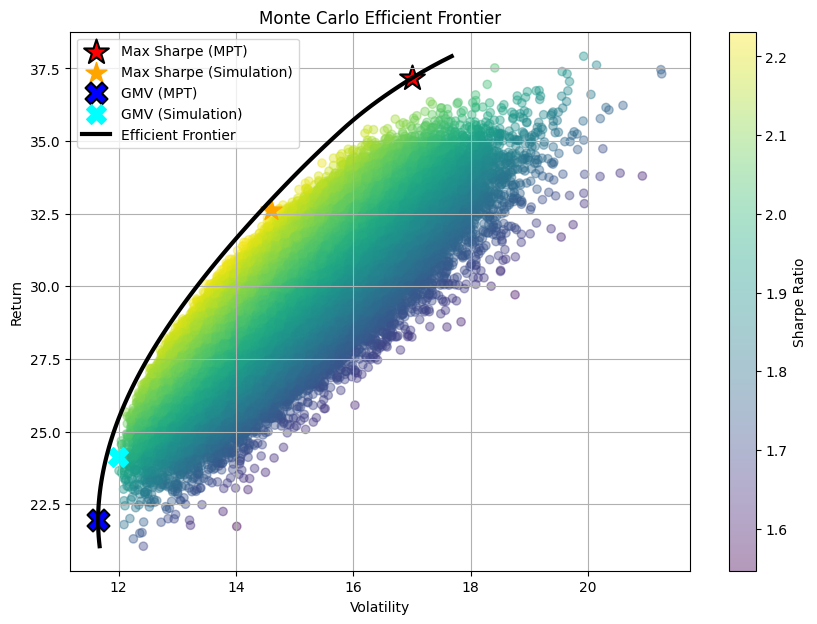

In [37]:
plt.figure(figsize=(10, 7))
plt.scatter(
    results_df["Volatility"],
    results_df["Return"],
    c=results_df["Sharpe"],
    cmap="viridis",
    alpha=0.4
)

plt.colorbar(label="Sharpe Ratio")

plt.scatter(sharpe_vol, sharpe_ret,
            color="red",
            marker="*",
            s=350,
            edgecolor="black",
            linewidth=1.5,
            label="Max Sharpe (MPT)")

plt.scatter(max_sharpe["Volatility"], max_sharpe["Return"],
            color="orange",
            marker="*",
            s=250,
            label="Max Sharpe (Simulation)")

plt.scatter(gmv_vol, gmv_ret,
            color="blue",
            marker="X",
            s=250,
            edgecolor="black",
            linewidth=1.5,
            label="GMV (MPT)")

plt.scatter(min_vol["Volatility"], min_vol["Return"],
            color="cyan",
            marker="X",
            s=200,
            label="GMV (Simulation)")

plt.plot(efficient_vols, target_returns,
         color='black',
         linewidth=3,
         label='Efficient Frontier')

plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Monte Carlo Efficient Frontier")
plt.legend()
plt.grid(True)
plt.show()


# Maximum Sharpe and Minimum Volatility values:

In [38]:
mc_max_sharpe_index = results_df["Sharpe"].idxmax()
mc_max_sharpe_weights = weight_record[mc_max_sharpe_index]

mc_gmv_index = results_df["Volatility"].idxmin()
mc_gmv_weights = weight_record[mc_gmv_index]

mc_max_sharpe_df = pd.DataFrame({
    "Stock": filtered_daily_returns.columns,
    "Weight": mc_max_sharpe_weights
}).sort_values("Weight", ascending=False)

mc_gmv_df = pd.DataFrame({
    "Stock": filtered_daily_returns.columns,
    "Weight": mc_gmv_weights
}).sort_values("Weight", ascending=False)

mpt_max_sharpe_weights = opt_sharpe.x

mpt_max_sharpe_df = pd.DataFrame({
    "Stock": filtered_daily_returns.columns,
    "Weight": mpt_max_sharpe_weights
}).sort_values("Weight", ascending=False)

mpt_gmv_weights = opt_gmv.x

mpt_gmv_df = pd.DataFrame({
    "Stock": filtered_daily_returns.columns,
    "Weight": mpt_gmv_weights
}).sort_values("Weight", ascending=False)

In [39]:
comparison = pd.DataFrame({
    "Stock": filtered_daily_returns.columns,
    "MC_MaxSharpe": mc_max_sharpe_weights,
    "MPT_MaxSharpe": mpt_max_sharpe_weights,
    "MC_GMV": mc_gmv_weights,
    "MPT_GMV": mpt_gmv_weights
})

comparison

,Stock,MC_MaxSharpe,MPT_MaxSharpe,MC_GMV,MPT_GMV
0,SBIN,0.127712,0.000000e+00,0.164054,1.325769e-01
1,HCLTECH,0.014023,1.261424e-17,0.174754,1.198536e-01
2,BAJAJ-AUTO,0.188987,2.459910e-01,0.073403,5.734278e-02
3,NESTLEIND,0.019978,2.005822e-17,0.213048,2.689572e-01
4,NTPC,0.093896,4.305585e-02,0.033580,2.539166e-02
5,SUNPHARMA,0.079514,3.744247e-17,0.143932,2.548468e-01
6,HINDALCO,0.046399,6.922176e-18,0.009932,6.368585e-03
7,ADANIPORTS,0.055848,1.291002e-01,0.005972,9.382299e-11
8,BHARTIARTL,0.271850,3.961484e-01,0.162573,1.346624e-01
9,TRENT,0.101792,1.857045e-01,0.018752,0.000000e+00


# Heatmap of Correlation

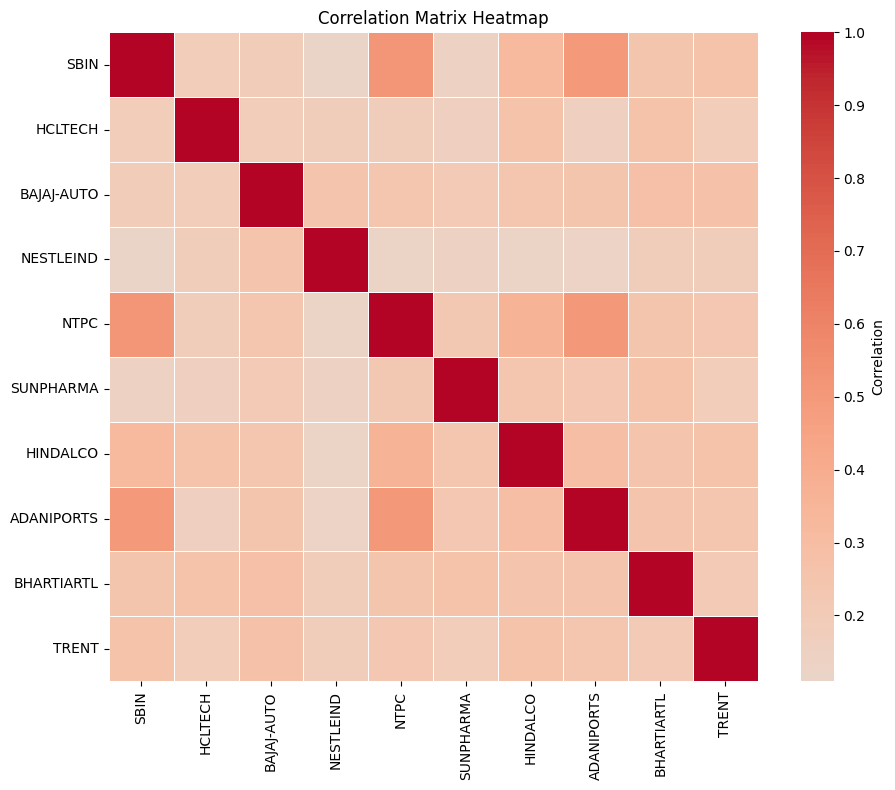

In [40]:
corr_matrix = filtered_daily_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Correlation"}
)

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()
